<center>
    <h1 style="font-size: 36px; font-weight: bold;">Predicting Potential Deposit Customers Using Machine Learning to Optimize Telemarketing Campaigns</h1>
</center>

## Business Problem
Tim marketing memiliki data mengenai kampanye telemarketing untuk produk deposito berjangka. Data ini mencakup nasabah yang berdeposito dan yang tidak berdeposito setelah menerima penawaran dari telemarketing.

### Permasalahan:
Tim marketing tidak selalu tahu nasabah mana yang akan berdeposito, meskipun sudah ada data yang tersedia mengenai interaksi mereka dengan pihak bank (seperti usia, status pekerjaan, saldo rekening, dan sebagainya).

### Metric:
#### False Positives (FP):
ML memprediksi nasabah akan berdeposito, padahal kenyataannya mereka tidak berdeposito.
**Konsekuensi:**
- Jika nasabah diprediksi akan berdeposito, tim marketing menghubungi nasabah tersebut. Hal ini menyebabkan biaya telemarketing yang tidak perlu.
- Biaya: Setiap panggilan telemarketing menghabiskan biaya untuk tenaga kerja dan sumber daya lainnya.

#### False Negatives (FN):
ML memprediksi nasabah akan tetap tidak berdeposito, padahal kenyataannya mereka berdeposito.
**Konsekuensi:**
- Jika nasabah diprediksi tidak akan berdeposito, tim marketing tidak menghubungi mereka. Ini menyebabkan kesempatan yang hilang untuk meningkatkan conversion rate dari kampanye.
- Biaya: Kehilangan potensi pendapatan karena nasabah yang sebenarnya berpotensi berdeposito tidak dihubungi.

### Cost Perbandingan:
Cost untuk melakukan telemarketing ke nasabah yang tidak berpotensi (FP) dianggap lebih rendah dibandingkan dengan biaya peluang dari kehilangan nasabah potensial yang seharusnya berdeposito (FN).
Oleh karena itu, cost FN lebih besar daripada cost FP. Hal ini membuat mendeteksi nasabah yang sebenarnya berdeposito menjadi prioritas utama.

### Maka dari itu, metric yang dipakai adalah:
**Recall:**
- Fokus utama adalah mendeteksi sebanyak mungkin nasabah yang akan berdeposito. Menghindari false negatives sangat penting untuk memaksimalkan conversion rate dan pendapatan dari kampanye telemarketing.
- Meskipun ada beberapa false positives (nasabah yang tidak akan berdeposito), biaya telemarketing lebih mudah dikelola dan tidak sebesar biaya peluang yang hilang akibat melewatkan prospek yang seharusnya berdeposito.

In [1]:
# Load library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

**Penjelasan:**
- `import numpy as np`: Mengimpor library `NumPy` yang digunakan untuk manipulasi data numerik dan array multidimensi.
- `import pandas as pd`: Mengimpor `pandas` untuk manipulasi dan analisis data, terutama data berbentuk tabel (DataFrame).
- `import seaborn as sns`: Mengimpor `seaborn` untuk visualisasi data statistik dengan cara yang lebih estetis dan mudah digunakan.
- `import matplotlib.pyplot as plt`: Mengimpor `matplotlib` untuk membuat berbagai jenis plot visualisasi data.
- `warnings.filterwarnings('ignore')`: Mengabaikan peringatan yang muncul selama eksekusi kode. Hal ini untuk menjaga kebersihan output.

## Data Understanding & Preparation
Pada tahap ini, dilakukan persiapan dataset yang akan digunakan dalam analisis. Proses ini meliputi pemahaman awal terhadap dataset dan pembersihan data untuk memastikan kualitas data yang baik sebelum digunakan untuk model klasifikasi.

### 1. Read Dataset
Dataset dibaca dari file CSV dan disimpan dalam DataFrame. Dataset ini berisi informasi mengenai kampanye pemasaran deposito berjangka, dengan tujuan untuk memprediksi apakah nasabah akan melakukan deposit atau tidak.

In [2]:
# Read dataset
df = pd.read_csv('data_bank_marketing_campaign.csv')

**Penjelasan:**
- `pd.read_csv('data_bank_marketing_campaign.csv')`: Membaca file CSV yang berisi dataset tentang kampanye pemasaran deposito berjangka dan menyimpannya ke dalam sebuah DataFrame `df_raw`.

### 2. Creating a Backup
Salinan dataset dibuat untuk memastikan data asli tetap utuh, agar perubahan atau pembersihan data tidak memengaruhi dataset asli.

In [3]:
# Backup
df_copy = df.copy()

**Penjelasan:**
- `df_raw.copy()`: Membuat salinan dari dataset agar data asli tetap utuh, sehingga perubahan atau pembersihan data yang dilakukan tidak akan memengaruhi data asli.
- `df_copy`: Variabel baru yang menyimpan salinan data tanpa mempengaruhi dataset asli.

### 3. Data Overview
Informasi mengenai kolom dan tipe data pada dataset ditampilkan untuk memberikan gambaran awal tentang struktur dataset.

In [4]:
# Data overview
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


### 4. Selecting Relevant Columns for Analysis
Kolom-kolom yang relevan untuk analisis dan pemodelan dipilih. Kolom target, yaitu apakah nasabah melakukan deposit atau tidak, juga dipilih sebagai variabel yang akan diprediksi.

In [5]:
# Memilih kolom yang relevan untuk analisis dan pemodelan
df_copy = df_copy[['job',                  # categorical
                   'housing',              # categorical
                   'loan',                 # categorical
                   'contact',              # categorical
                   'month',                # categorical
                   'poutcome',              # categorical
                   'age',                  # numerical (scaled)
                   'balance',              # numerical (scaled)
                   'campaign',             # numerical (scaled)
                   'pdays',                # numerical (scaled)
                   'deposit'               # target variable
                  ]]

**Penjelasan:**
* **Fitur Kategorikal**: Kolom-kolom seperti `job`, `housing`, `loan`, `contact`, dan `month` adalah **variabel kategorikal** yang menggambarkan informasi deskriptif tentang nasabah dan konteks interaksi dengan mereka.
* **Fitur Numerik**: Kolom `campaign`, `pdays`, `balance`, dan `age` adalah **variabel numerik** yang menggambarkan jumlah kontak, waktu sejak kontak terakhir, saldo rekening, dan usia nasabah.
* **Target**: Kolom `deposit` adalah **variabel target** yang ingin diprediksi, yaitu apakah nasabah akan melakukan deposit atau tidak (`yes/no`).

| **Kolom**    | **Deskripsi**                                                                               | **Tipe Data** | **Keterangan**          |
| ------------ | ------------------------------------------------------------------------------------------- | ------------- | ----------------------- |
| **job**      | Profesi nasabah                                                                             | Categorical   | Tidak ada nilai hilang. |
| **housing**  | Status kepemilikan rumah nasabah (yes/no)                                                   | Categorical   | Tidak ada nilai hilang. |
| **loan**     | Status pinjaman nasabah (yes/no)                                                            | Categorical   | Tidak ada nilai hilang. |
| **contact**  | Saluran komunikasi yang digunakan untuk menghubungi nasabah (cellular, telephone, other)    | Categorical   | Tidak ada nilai hilang. |
| **month**    | Bulan kontak terakhir dilakukan dengan nasabah                                              | Categorical   | Tidak ada nilai hilang. |
| **poutcome** | Hasil kampanye sebelumnya (success, failure, other)                                         | Categorical   | Tidak ada nilai hilang. |
| **age**      | Usia nasabah                                                                                | Numeric       | Tidak ada nilai hilang. |
| **balance**  | Saldo rekening nasabah                                                                      | Numeric       | Tidak ada nilai hilang. |
| **campaign** | Jumlah kontak yang dilakukan pada kampanye ini                                              | Numeric       | Tidak ada nilai hilang. |
| **pdays**    | Jumlah hari sejak kontak terakhir dilakukan (nilai -1 berarti belum pernah dihubungi)       | Numeric       | Tidak ada nilai hilang. |
| **deposit**  | Apakah nasabah melakukan deposit atau tidak (target variabel)                               | Numeric       | Tidak ada nilai hilang. |

### 5. Displaying Descriptive Statistics
Statistik deskriptif ditampilkan untuk memberikan gambaran mengenai nilai rata-rata, standar deviasi, dan rentang nilai untuk kolom numerik, serta distribusi frekuensi untuk kolom kategorikal.

In [6]:
# Menampilkan statistik deskriptif untuk semua kolom
df_copy.describe(include='all')

,job,housing,loan,contact,month,poutcome,age,balance,campaign,pdays,deposit
count,7813,7813,7813,7813,7813,7813,7813.000000,7813.000000,7813.000000,7813.000000,7813
unique,12,2,2,3,12,4,NaN,NaN,NaN,NaN,2
top,management,no,no,cellular,may,unknown,NaN,NaN,NaN,NaN,no
freq,1792,4140,6789,5628,1976,5819,NaN,NaN,NaN,NaN,4081
mean,NaN,NaN,NaN,NaN,NaN,NaN,41.257264,1512.448611,2.519775,51.408550,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,11.919710,3089.291831,2.727001,108.072739,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,-6847.000000,1.000000,-1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.000000,127.000000,1.000000,-1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,39.000000,549.000000,2.000000,-1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,49.000000,1684.000000,3.000000,40.000000,NaN


### 6. Checking for Duplicates
Pemeriksaan duplikasi dilakukan untuk melihat apakah ada baris yang terduplikasi dalam dataset, yang bisa memengaruhi analisis atau model.

In [7]:
# Cek duplikasi di seluruh dataset
duplicates = df_copy.duplicated()

# Jumlah baris duplikat
print(f'Jumlah duplikasi: {duplicates.sum()}')

Jumlah duplikasi: 8


Hasil pemeriksaan menunjukkan apakah baris yang terdeteksi sebagai duplikat memiliki perbedaan relevan, seperti pada kolom age, yang menunjukkan bahwa setiap baris mungkin mewakili nasabah yang berbeda.

In [8]:
# Lihat baris duplikat
df_copy[duplicates]

,job,housing,loan,contact,month,poutcome,age,balance,campaign,pdays,deposit
2944,blue-collar,yes,no,unknown,may,unknown,40,0,2,-1,no
4368,management,no,no,cellular,aug,unknown,60,0,3,-1,yes
4874,management,no,no,cellular,aug,unknown,41,0,2,-1,no
5326,blue-collar,yes,no,cellular,jul,unknown,44,0,1,-1,no
5609,technician,yes,no,unknown,may,unknown,39,0,1,-1,no
5681,technician,no,no,cellular,aug,unknown,38,0,2,-1,no
5905,management,no,no,cellular,aug,unknown,34,0,2,-1,no
7077,blue-collar,yes,no,unknown,may,unknown,30,239,1,-1,yes


**Insight:**
- Meskipun 8 baris ini terdeteksi sebagai duplikat, ternyata setiap baris memiliki nilai `age` yang berbeda pada `job` yang sama, yang menunjukkan bahwa setiap baris ini mewakili nasabah yang berbeda.
- Tidak perlu menghapus duplikasi ini karena data yang terdeteksi sebagai duplikat merupakan entri yang valid untuk nasabah yang berbeda

### 7. Displaying Unique Values from Categorical Columns
Pada tahap ini, dilakukan pemeriksaan terhadap nilai unik dari setiap kolom kategorikal. Langkah ini memberikan gambaran mengenai variasi kategori yang ada dalam setiap kolom dan membantu memahami distribusi data serta potensi encoding untuk model klasifikasi.

In [9]:
# Unique values kolom kategori
categorical_columns = df_copy.select_dtypes(include=['object']).columns
unique_values = {col: df_copy[col].unique() for col in categorical_columns}

for column, unique_vals in unique_values.items():
    print(f"Unique values in '{column}': {unique_vals}")

Unique values in 'job': ['admin.' 'self-employed' 'services' 'housemaid' 'technician' 'management'
 'student' 'blue-collar' 'entrepreneur' 'retired' 'unemployed' 'unknown']
Unique values in 'housing': ['no' 'yes']
Unique values in 'loan': ['no' 'yes']
Unique values in 'contact': ['cellular' 'telephone' 'unknown']
Unique values in 'month': ['jun' 'apr' 'may' 'nov' 'jan' 'sep' 'feb' 'mar' 'aug' 'jul' 'oct' 'dec']
Unique values in 'poutcome': ['unknown' 'other' 'failure' 'success']
Unique values in 'deposit': ['yes' 'no']


**Insight:**
Mengubah atau menghapus nilai unknown bisa menyebabkan hilangnya informasi penting atau menghasilkan bias dalam model. Dengan membiarkan nilai ini, model dapat belajar untuk menghadapinya secara tepat, yang akan meningkatkan kemampuan model dalam menangani data tidak lengkap di dunia nyata tanpa mengurangi akurasi prediksi.

## EDA
Pada tahap Exploratory Data Analysis (EDA), dilakukan eksplorasi dataset untuk memperoleh pemahaman awal tentang distribusi data, hubungan antar fitur, dan karakteristik dataset yang dapat memengaruhi proses modeling.

Langkah pertama adalah memeriksa distribusi kolom deposit, yang merupakan target dalam prediksi. Distribusi antara nasabah yang berdeposito (yes) dan yang tidak berdeposito (no) dihitung dalam persentase.

In [10]:
# Cek kolom target
perc = (df_copy['deposit'].value_counts(normalize=True) * 100).round(2)
perc

deposit
no     52.23
yes    47.77
Name: proportion, dtype: float64

**Insight:**
- Secara umum, proporsi tidak terlalu imbalanced, yang berarti bahwa model klasifikasi yang digunakan tidak akan terlalu kesulitan dalam membedakan kedua kelas.

### Univariate Analysis
Pada tahap ini, dilakukan univariate analysis pada kolom-kolom numerik untuk melihat distribusi masing-masing fitur menggunakan histogram dan Kernel Density Estimation (KDE).

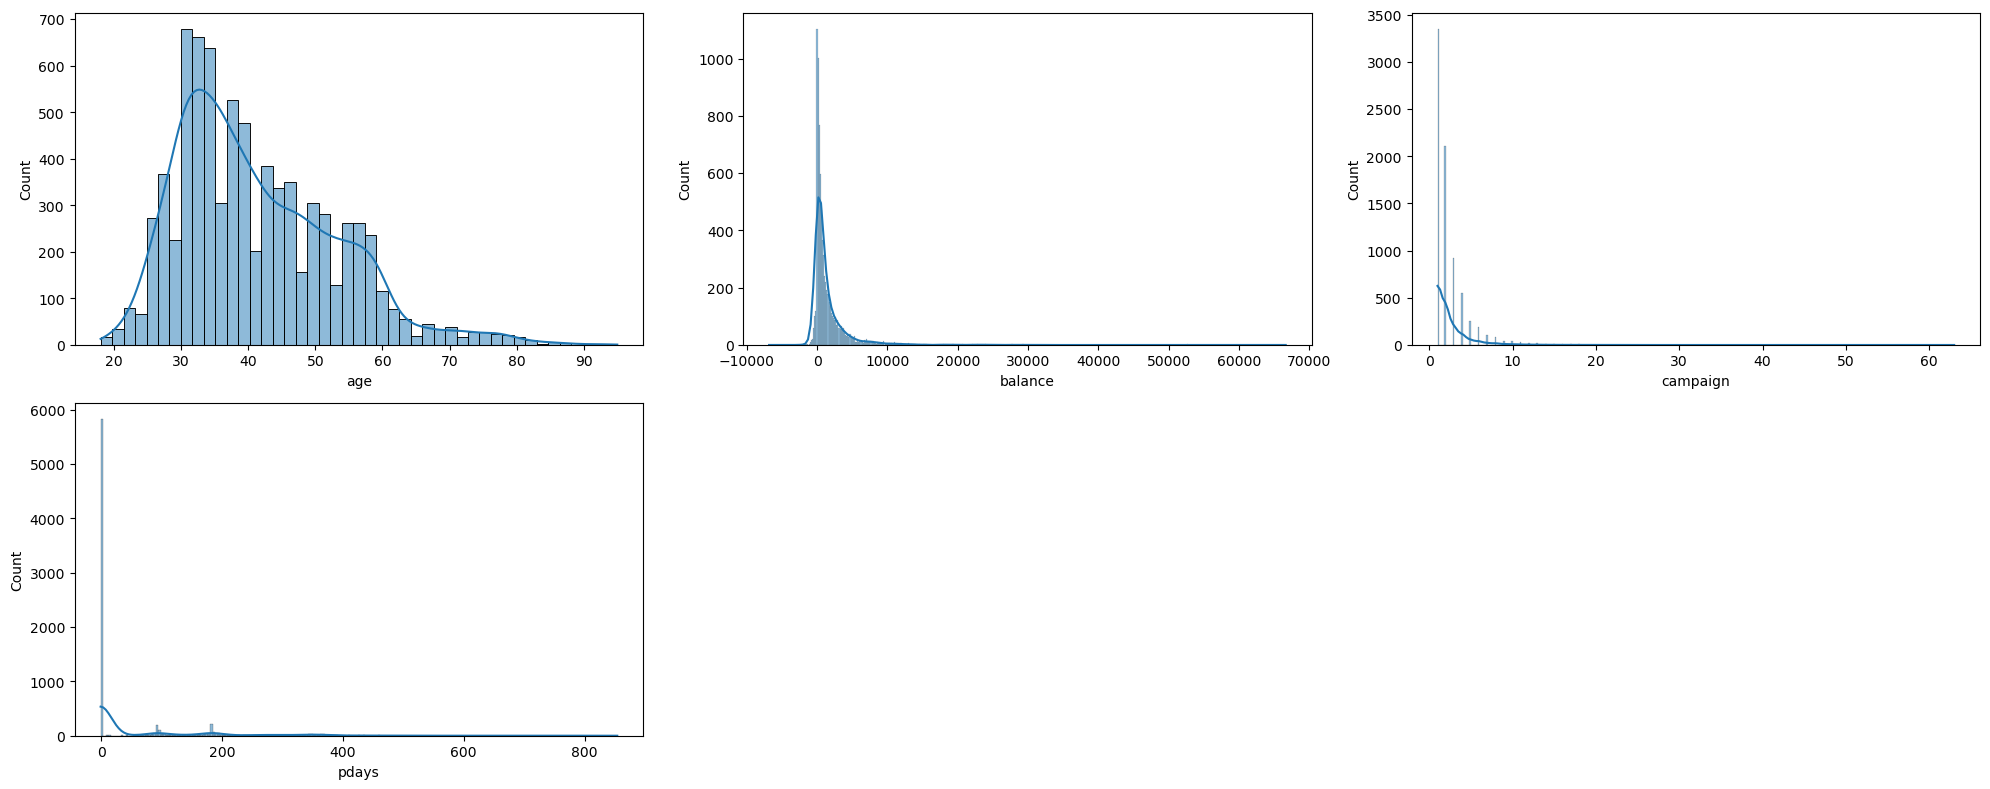

In [11]:
# Kolom numerik
num_cols = df_copy.describe().columns
plt.figure(figsize=(20, 8))

# Loop untuk setiap kolom numerik dan membuat subplot
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_copy[col], kde=True)
plt.tight_layout()
plt.show()

**Insight:**
- Skewness
- Untuk data yang skewed, menggunakan Robust Scaler, yang lebih tahan terhadap outliers

### Bivariate Analysis terhadap Kolom Target
Dilakukan juga bivariate analysis antara kolom target `deposit` dan kolom numerik lainnya dengan menggunakan bar plot untuk membandingkan distribusi median antara nasabah yang berdeposito dan yang tidak berdeposito.

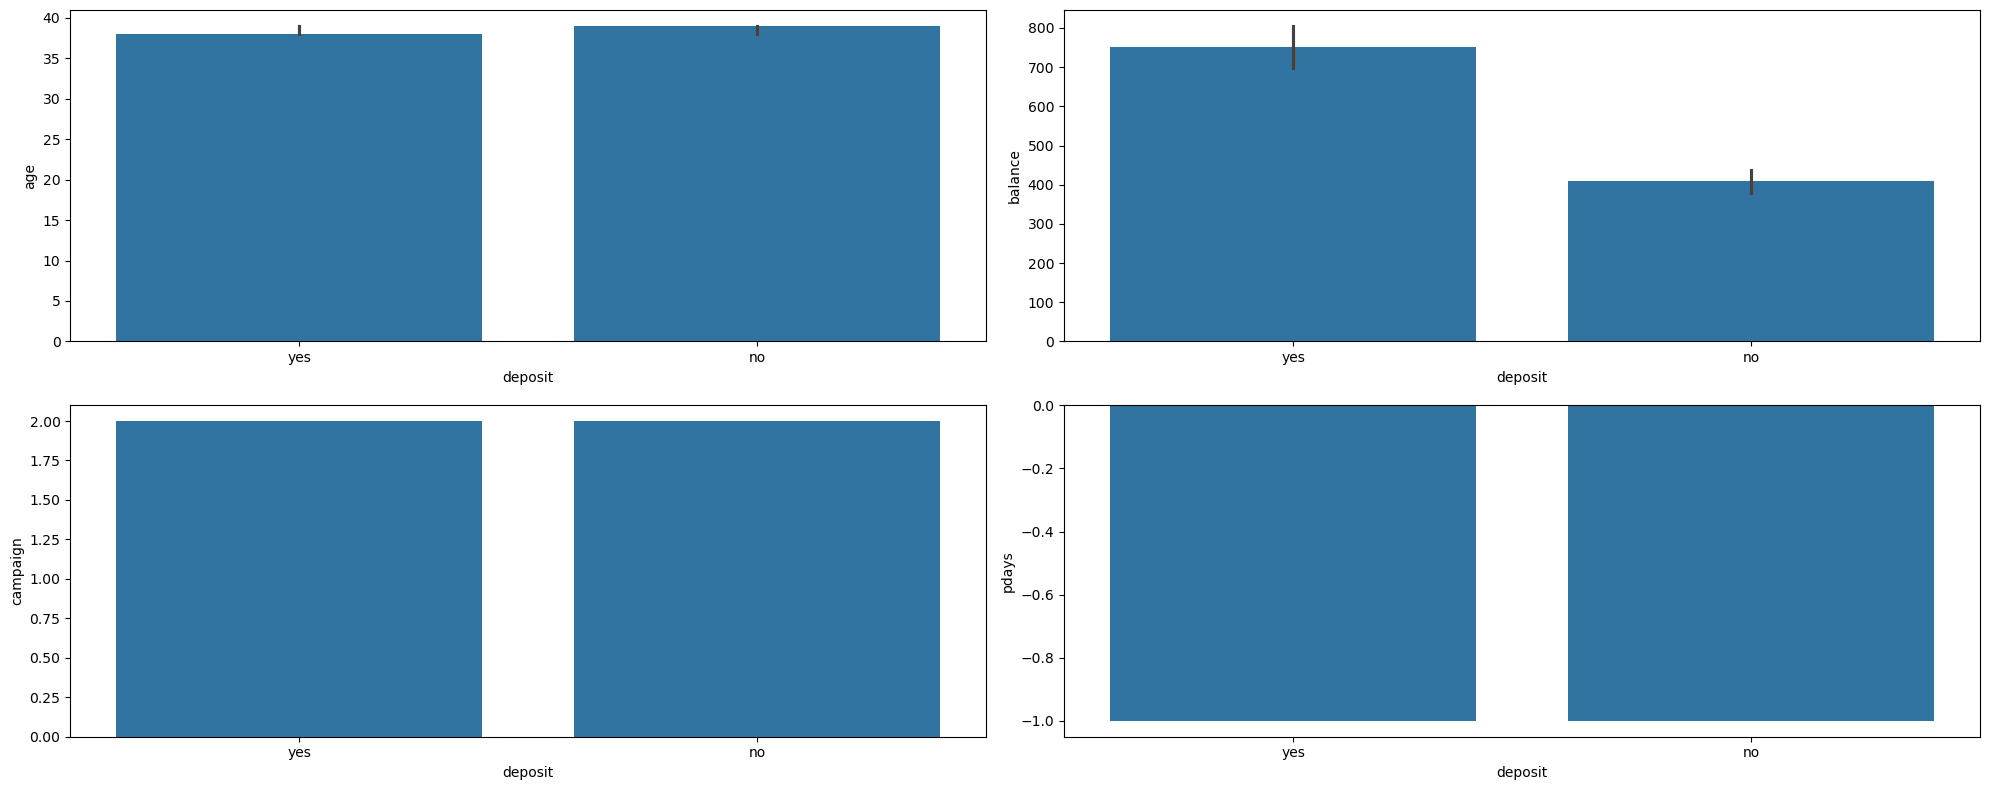

In [12]:
# Loop untuk setiap kolom numerik dan membuat subplot
plt.figure(figsize=(20, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.barplot(data=df_copy, x='deposit', y=col, estimator='median')

plt.tight_layout()
plt.show()

### Univariate Analysis untuk Kolom Kategorikal
Langkah berikutnya adalah memeriksa kolom kategorikal seperti job, housing, loan dan contact menggunakan count plot untuk melihat distribusi kategori berdasarkan status deposit (berdeposito atau tidak).

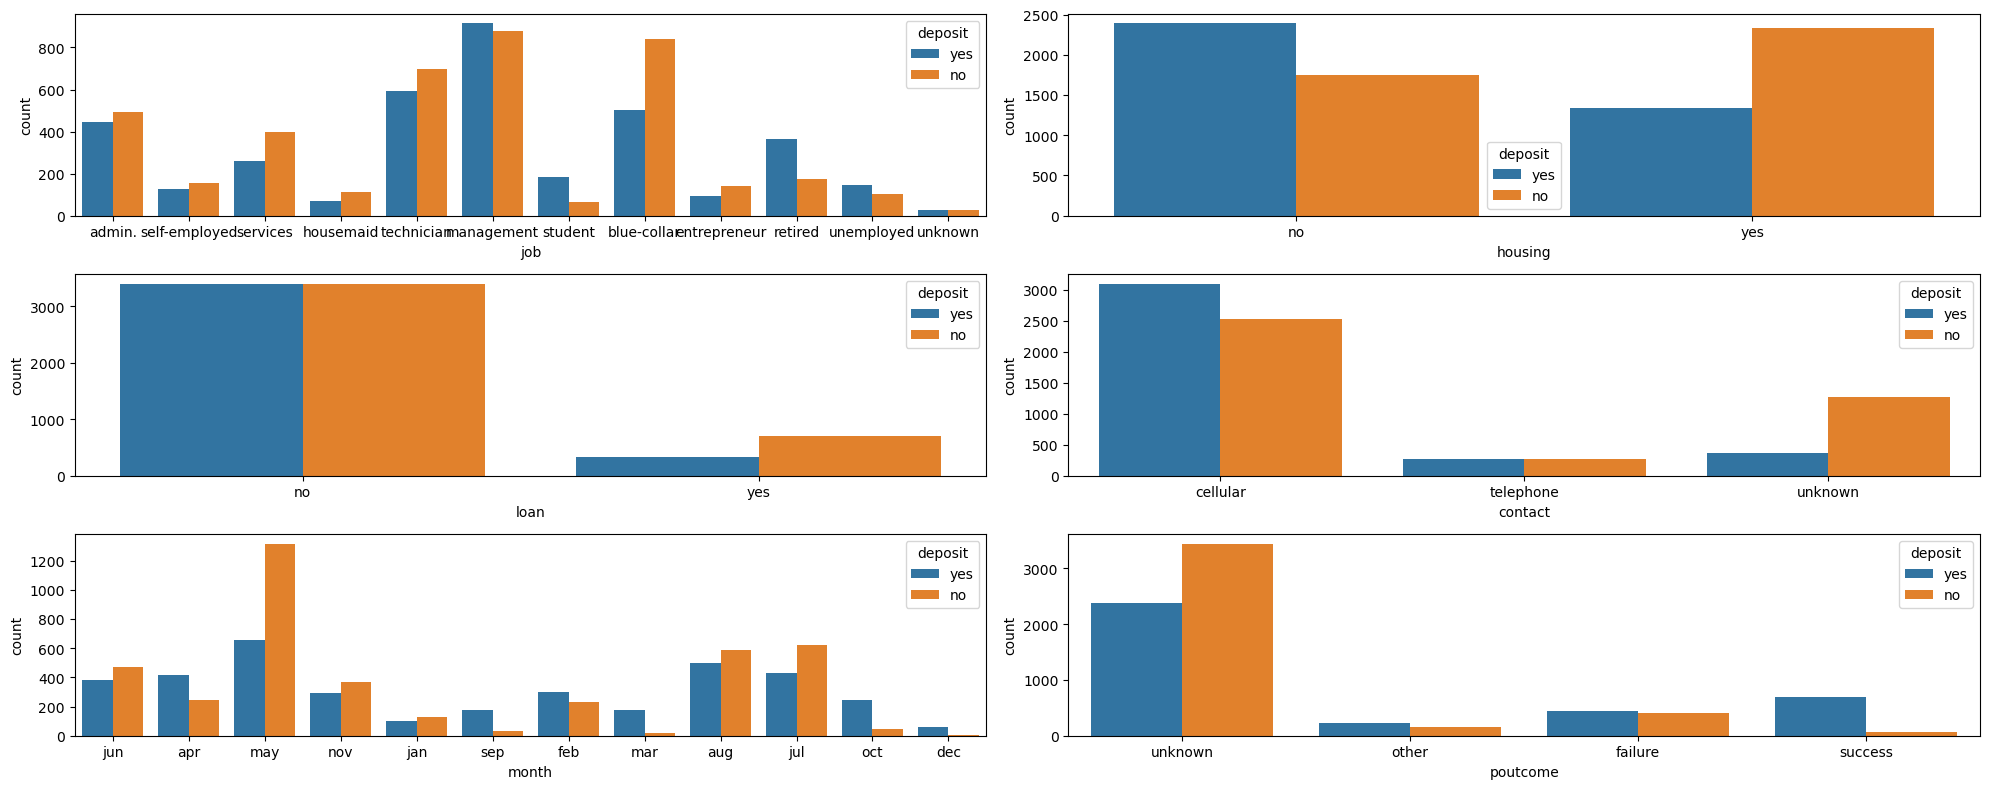

In [13]:
# Kolom kategorikal yang ingin dianalisis
cols_cat = ['job', 'housing', 'loan', 'contact', 'month', 'poutcome']
plt.figure(figsize=(20, 8))

# Loop untuk setiap kolom kategorikal dan membuat subplot
for i, col in enumerate(cols_cat):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=df_copy, x=col, hue='deposit')

plt.tight_layout()
plt.show()

## Define X & y
Pada tahap ini, variabel target `deposit` akan dipersiapkan untuk digunakan dalam pemodelan. Selain itu, fitur-fitur yang akan digunakan dalam model juga akan dipisahkan dari kolom target. Berikut adalah langkah-langkah yang dilakukan:

### 1. Changing Target Column Values
Kolom deposit yang berisi nilai kategorikal `yes/no` akan diubah menjadi format numerik, yaitu 1 untuk `yes` dan 0 untuk `no`. Ini dilakukan agar variabel target dapat digunakan dalam algoritma klasifikasi yang membutuhkan input numerik.

In [14]:
# Ubah deposit ke 0 dan 1
df_copy['deposit'] = df_copy['deposit'].map({'no': 0, 'yes': 1})

### 2. Defining the Features
Fitur yang digunakan untuk prediksi dipisahkan dari kolom target. Kolom-kolom selain `deposit` akan digunakan sebagai fitur dalam model.

Kolom `deposit` yang sudah diubah menjadi numerik akan digunakan sebagai variabel target `y` untuk model klasifikasi.

In [15]:
# Columns
X = df_copy.drop(columns = ['deposit'])

# Target
y = df_copy['deposit']

## Train Test Split
Pada tahap ini, dataset akan dibagi menjadi dua bagian: data pelatihan (training set) dan data pengujian (test set). Pembagian data ini penting agar model dapat dilatih menggunakan data pelatihan dan dievaluasi menggunakan data yang belum pernah dilihat sebelumnya (data pengujian). Berikut adalah langkah-langkahnya:

### 1. Splitting the Data
Data akan dibagi dengan proporsi 80% untuk data pelatihan dan 20% untuk data pengujian. Pembagian ini memastikan bahwa model dapat dilatih dengan data yang cukup dan diuji dengan data yang representatif.

In [16]:
# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
                                    X,
                                    y,
                                    test_size = 0.2,
                                    random_state = 42,
                                    )

In [17]:
# Menentukan kolom mana saja yang masuk ke kategori dan numerik
cat_cols = ['job', 'housing', 'loan', 'contact', 'month', 'poutcome']
num_cols = ['age', 'balance', 'campaign', 'pdays']

### 2. Handling Numerical and Categorical Columns
Setelah pembagian data, tahapan selanjutnya adalah transformasi fitur baik untuk kolom numerik maupun kategorikal. Kolom numerik akan diproses menggunakan RobustScaler, yang lebih tahan terhadap outliers, sementara kolom kategorikal akan diubah menjadi format yang sesuai menggunakan OneHotEncoder karena tidak memiliki urutan atau hierarki antar kategori.

In [18]:
# Pipeline untuk kolom numerik
scale = Pipeline(steps = [
    ('scaler', RobustScaler())  # Scaling menggunakan RobustScaler
])

# Pipeline untuk kolom kategorikal
cat = Pipeline(steps = [
    ('ohe', OneHotEncoder(drop = 'first'))  # OneHotEncoding, menghapus kategori pertama untuk menghindari dummy variable trap
])

# Column Transformer
ct = ColumnTransformer(transformers = [
    ('cat', cat, cat_cols),
    ('scale', scale, num_cols)
], remainder='passthrough')

## Modeling

### 1. Modeling with Basic Schema
Pada tahap ini, berbagai model klasifikasi diuji untuk memprediksi apakah nasabah akan melakukan deposito atau tidak, berdasarkan fitur yang telah diproses sebelumnya. Fokus utama adalah meminimalkan false negatives (FN), karena biaya peluang yang terkait dengan nasabah yang tidak terhubung meskipun berpotensi berdeposito jauh lebih tinggi daripada biaya telemarketing kepada nasabah yang tidak berpotensi (false positives).

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### 2. Model Definitions
- **Random Forest** → Kuat menangani data non‑linier & interaksi fitur, akurat, robust terhadap noise, efektif meminimalkan FN.  
- **XGBoost** → Boosting bertahap, cepat, efisien, mampu meningkatkan recall dengan mengurangi kesalahan model sebelumnya.  
- **Gradient Boosting** → Iteratif, fokus mengurangi FN, bisa diatur untuk hindari overfitting.  
- **KNN** → Sederhana, intuitif, jadi pembanding untuk model kompleks.  
- **Decision Tree** → Mudah diinterpretasi, cepat, baseline untuk memahami pengaruh fitur.  

In [ ]:
# Defisini Model
models = {'RandomForest': RandomForestClassifier(random_state = 42),
          'XGBoost': XGBClassifier(random_state = 42),
          'GradienBoost': GradientBoostingClassifier(random_state = 42),
          'KNN': KNeighborsClassifier(),
          'Tree': DecisionTreeClassifier(random_state = 42)}

### 3. Cross-Validation & Evaluation Metrics

Model dievaluasi menggunakan metrik:  
- **Recall** – Metrik utama untuk mengukur kemampuan model mendeteksi nasabah berpotensi berdeposito, karena *false negatives* (FN) memiliki biaya peluang tinggi.  
- **F2-Score** – Menekankan recall dengan penalti lebih besar pada FN dibanding *false positives*.  
- **ROC-AUC** – Mengukur kemampuan model membedakan kelas `yes` dan `no`.  

Evaluasi dilakukan dengan **Stratified K-Fold Cross-Validation**.  
Metode ini memastikan distribusi kelas `yes` dan `no` (53:47, relatif seimbang) tetap konsisten di setiap fold, sehingga hasil evaluasi lebih representatif dan stabil.  

**Alasan pemilihan Stratified K-Fold:**  
- Menjaga proporsi kelas di setiap fold, sehingga evaluasi lebih akurat dan tidak bias.  
- Lebih stabil dibanding K-Fold biasa, terutama untuk metrik seperti recall.  
- Menghindari risiko distribusi kelas yang timpang di fold tertentu, meskipun dataset relatif seimbang.  

Hasil dari setiap fold diurutkan berdasarkan **recall** sebagai prioritas utama. Model dengan recall tertinggi dipilih untuk mendeteksi nasabah yang berpotensi berdeposito.  

In [21]:
# Placeholder untuk hasil
results = []

# Loop untuk setiap model
for name, model in models.items():
    # Membuat pipeline dengan preprocessing dan model
    pipe = Pipeline([
        ('transformer', ct), # ColumnTransformer untuk preprocessing
        ('model', model)]) # Model klasifikasi
    
    # F2-Score dengan make_scorer
    F2 = make_scorer(fbeta_score, beta=2)

    # Cross-validation untuk Accuracy, Recall, Precision, F1, dan ROC-AUC
    rec = cross_val_score(pipe, X_train, y_train, cv = skf, scoring = 'recall')
    f2 = cross_val_score(pipe, X_train, y_train, cv = skf, scoring = F2)
    roc = cross_val_score(pipe, X_train, y_train, cv = skf, scoring = 'roc_auc')
    
    # Menyimpan hasil
    results.append({'Model': name,
                   'Recall': rec.mean(),
                   'F2-Score': f2.mean(),
                   'ROC-AUC': roc.mean()
                   })

# Menampilkan hasil
df_result = pd.DataFrame(results).sort_values('Recall', ascending = False)
df_result

,Model,Recall,F2-Score,ROC-AUC
0,RandomForest,0.642637,0.653835,0.754018
2,XGBoost,0.634264,0.647917,0.752568
1,GradienBoost,0.609119,0.632724,0.774602
4,Tree,0.608117,0.607950,0.624582
3,KNN,0.606093,0.617895,0.710078


**Insight:**
- RandomForest menghasilkan Recall tertinggi (0.6426)
- XGBoost sedikit lebih rendah dalam hal recall (0.6342)
- GradientBoost memiliki recall yang lebih rendah (0.6091)
- Decision Tree memiliki Recall yang sedikit lebih rendah (0.6081)
- KNN menghasilkan Recall yang hampir sama dengan Decision Tree (0.6061)

### 4. Modeling with SMOTE
Meskipun dataset ini **seimbang** dengan rasio 57:43, hasil model tanpa SMOTE menunjukkan **recall yang rendah**, menandakan bahwa kelas minoritas masih kurang terwakili. Oleh karena itu, **SMOTE** diterapkan untuk menambah **keberagaman data** kelas minoritas dengan menghasilkan contoh sintetis, yang membantu model lebih mengenali pola dalam kelas tersebut. Penggunaan SMOTE terbukti meningkatkan **recall**, terutama pada model seperti **Random Forest**, yang sebelumnya kurang efektif. Meskipun terjadi sedikit peningkatan false positives, penurunan false negatives yang signifikan menunjukkan bahwa SMOTE membuat model lebih sensitif dalam mengidentifikasi nasabah potensial. Dengan demikian, meskipun data seimbang, penggunaan SMOTE memberikan **peningkatan recall yang substansial** tanpa mengorbankan metrik lain seperti ROC-AUC.

In [22]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

results = []
for name, model in models.items():
    pipe = ImbPipeline([
        ('Preprocessing', ct),
        ('smote', SMOTE(random_state = 42)),
        ('model', model)
    ])

    # Cross-validation untuk Accuracy, Recall, Precision, F1, dan ROC-AUC
    rec = cross_val_score(pipe, X_train, y_train, cv = skf, scoring = 'recall')
    f2 = cross_val_score(pipe, X_train, y_train, cv = skf, scoring = F2)
    roc = cross_val_score(pipe, X_train, y_train, cv = skf, scoring = 'roc_auc')

    # Menyimpan hasil
    results.append({
        'Model': name,
        'Recall': rec.mean(),
        'F2': f2.mean(),
        'ROC-AUC': roc.mean()
    })

# Menampilkan hasil
df_result = pd.DataFrame(results).sort_values('Recall', ascending = False)
df_result

,Model,Recall,F2,ROC-AUC
0,RandomForest,0.651019,0.660706,0.752938
1,GradienBoost,0.640624,0.657113,0.774244
2,XGBoost,0.638618,0.651628,0.752031
3,KNN,0.632912,0.637415,0.707299
4,Tree,0.619843,0.614659,0.617431


**Insight:**
- RandomForest menghasilkan Recall tertinggi (0.6510), diikuti oleh GradientBoost dengan recall (0.6406)
- XGBoost sedikit lebih rendah dengan recall (0.6386)
- KNN dan Decision Tree memiliki recall lebih rendah dibandingkan model lainnya, dengan nilai (0.6329) dan (0.6198)

Meskipun penerapan SMOTE memberikan peningkatan sedikit pada recall, hasilnya masih tergolong relatif rendah. Ini menunjukkan bahwa meskipun SMOTE membantu menambah keberagaman data, tantangan utama dalam meningkatkan recall masih belum sepenuhnya teratasi, dan model-model yang digunakan belum sepenuhnya optimal dalam mendeteksi nasabah yang berpotensi berdeposito.

### 5. Modeling with Best Model
Pada tahap ini, model terbaik yang terpilih, yaitu Random Forest diterapkan pada data uji untuk mendapatkan prediksi dan mengevaluasi performa model menggunakan beberapa metrik, termasuk recall, ROC-AUC, dan F2-Score.

In [23]:
from sklearn.metrics import roc_auc_score, classification_report, recall_score

In [24]:
baseline_pipe = Pipeline([
        ('Preprocessing', ct),
        ('model', RandomForestClassifier(random_state = 42))
    ])

# Fit dan evaluasi di test set
baseline_pipe.fit(X_train, y_train)
y_pred = baseline_pipe.predict(X_test)
y_pred_proba = baseline_pipe.predict_proba(X_test)[:,1]

recall_baseline = recall_score(y_test, y_pred)
roc_baseline = roc_auc_score(y_test, y_pred_proba)
f2_baseline = fbeta_score(y_test, y_pred, beta = 2)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74       814
           1       0.73      0.66      0.69       749

    accuracy                           0.72      1563
   macro avg       0.72      0.72      0.72      1563
weighted avg       0.72      0.72      0.72      1563



**Insight:**
1. **Recall pada Kelas `0` vs Kelas `1`**:
   - Recall untuk kelas `0` (nasabah yang **tidak berdeposito**) adalah **0.78**, yang menunjukkan bahwa model sangat efektif dalam mengidentifikasi nasabah yang tidak berdeposito. Ini berarti model dapat dengan baik menghindari false positives untuk nasabah yang tidak berpotensi berdeposito.
   - Namun, recall untuk kelas `1` (nasabah yang **berdeposito**) lebih rendah di **0.66**. Ini menunjukkan bahwa model masih kesulitan dalam mendeteksi nasabah yang sebenarnya akan berdeposito. Meskipun false positives masih bisa ditoleransi dalam konteks bisnis ini, false negatives (FN) menjadi masalah utama yang perlu diatasi, karena kehilangan nasabah potensial dapat berdampak pada pendapatan.

2. **Precision vs Recall Trade-off**:
   - Precision untuk kelas `1` adalah **0.73**, lebih tinggi daripada recall-nya (**0.66**). Ini menunjukkan bahwa meskipun model cukup akurat dalam memprediksi nasabah yang akan berdeposito, masih ada beberapa false positives, yaitu nasabah yang diprediksi akan berdeposito tetapi tidak. Meski begitu, precision yang relatif tinggi mengindikasikan bahwa ketika model mengatakan nasabah akan berdeposito, kemungkinan besar itu benar.
   - Precision untuk kelas `0` adalah **0.71**, lebih rendah dibandingkan recall-nya. Hal ini menunjukkan bahwa model lebih fokus pada mengidentifikasi nasabah yang tidak berdeposito, namun sedikit lebih cenderung memprediksi beberapa nasabah yang sebenarnya akan berdeposito sebagai tidak berdeposito (false negatives).

3. **F1-Score**:
   - **F1-Score** untuk kelas `0` adalah **0.74**, sedangkan untuk kelas `1` adalah **0.69**. Hal ini menunjukkan bahwa model lebih baik dalam memprediksi kelas `0` dengan keseimbangan antara precision dan recall yang lebih tinggi. Sebaliknya, untuk kelas `1`, meskipun recall lebih rendah, precision relatif lebih baik, tetapi tidak cukup untuk menghasilkan F1-score yang setinggi kelas `0`.

4. **Akurasi dan Rata-Rata**:
   - **Akurasi** model secara keseluruhan adalah **0.72**, yang mengindikasikan bahwa model ini dapat memberikan prediksi yang benar pada sekitar 72% data. Meskipun ini adalah angka yang cukup baik, masih ada ruang untuk perbaikan, terutama dalam hal recall untuk kelas 1, yang akan berdampak pada kemampuan model untuk mendeteksi lebih banyak nasabah berpotensi berdeposito.
   - **Rata-rata Makro dan Rata-rata Terbobot** menunjukkan hasil yang seimbang di antara kedua kelas, dengan nilai **0.72** untuk precision, recall, dan f1-score secara keseluruhan. ni menunjukkan bahwa meskipun ada ketidakseimbangan kinerja antara kelas 0 dan 1, model secara keseluruhan tidak terlalu condong ke salah satu kelas.

### 6. Hypertuning Parameter
Pada tahap ini, dilakukan Hyperparameter Tuning untuk Random Forest menggunakan RandomizedSearchCV untuk mencari kombinasi parameter yang optimal, dengan harapan dapat meningkatkan performa model, terutama dalam mendeteksi nasabah yang berpotensi berdeposito. Proses tuning dilakukan untuk mendapatkan pengaturan parameter yang lebih tepat agar dapat memperbaiki kemampuan model dalam memprediksi kelas `1` (nasabah yang berdeposito).

In [25]:
from sklearn.model_selection import RandomizedSearchCV

# Inisialisasi RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)

# Membuat pipeline dengan preprocessing dan model
pipe = Pipeline([
    ('Preprocessing', ct),  # Pastikan 'ct' adalah ColumnTransformer atau preprocessing steps lainnya
    ('model', rf_model)
])

# Membuat parameter distribusi untuk RandomizedSearchCV
param_dist = {
    'model__n_estimators': [100, 200, 500, 1000],  # Jumlah pohon keputusan
    'model__max_depth': [3, 5, 7, 10, None],  # Kedalaman maksimum pohon
    'model__min_samples_split': [2, 5, 10],  # Minimal sampel untuk membagi node
    'model__min_samples_leaf': [1, 2, 4],  # Minimal sampel di tiap daun
    'model__max_features': ['auto', 'sqrt', 'log2'],  # Fitur maksimum yang dipilih di tiap split
    'model__bootstrap': [True, False]  # Apakah bootstrap sampling digunakan
}

# Hyperparameter tuning menggunakan RandomizedSearchCV
random_search = RandomizedSearchCV(estimator = pipe, param_distributions = param_dist, 
                                   n_iter = 50, scoring = 'recall', cv = 5, n_jobs = -1, verbose = 2, random_state = 42)

# Fit model dengan training data
random_search.fit(X_train, y_train)

# Menampilkan hasil terbaik dari random search
print('Best parameters found: ', random_search.best_params_)
print('Best cross-validation score: {:.2f}'.format(random_search.best_score_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'model__n_estimators': 1000, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_features': 'log2', 'model__max_depth': None, 'model__bootstrap': False}
Best cross-validation score: 0.65


**Score Cross-Validation:**
- Best cross-validation score (0.65) menunjukkan bahwa meskipun parameter terbaik telah ditemukan, performa model masih terbatas. Meskipun ada peningkatan dari model sebelumnya, nilai recall yang relatif rendah menunjukkan bahwa model kesulitan dalam mendeteksi nasabah yang berpotensi berdeposito. Angka ini mengindikasikan bahwa meskipun telah dilakukan tuning, model belum sepenuhnya mampu mengatasi masalah false negatives yang menjadi perhatian utama.

In [26]:
# Evaluasi di test set
y_pred_tuned = random_search.predict(X_test)
y_pred_proba_tuned = random_search.predict_proba(X_test)[:,1]

recall_tuned = recall_score(y_test, y_pred_tuned)
roc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)
f2_tuned = fbeta_score(y_test, y_pred_tuned, beta = 2)

print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.71      0.76      0.74       814
           1       0.72      0.67      0.69       749

    accuracy                           0.72      1563
   macro avg       0.72      0.72      0.72      1563
weighted avg       0.72      0.72      0.72      1563



**Hasil Evaluasi Model yang Ditingkatkan:**
- Model menunjukkan beberapa peningkatan, namun recall untuk kelas `1` (nasabah yang berdeposito) masih tetap rendah. 

In [27]:
results_df = pd.DataFrame({
    'Model': ['Baseline Model', 'Tuned Model'],
    'Recall': [recall_baseline, recall_tuned],
    'ROC-AUC': [roc_baseline, roc_tuned],
    'F2': [f2_baseline, f2_tuned]
})
results_df

,Model,Recall,ROC-AUC,F2
0,Baseline Model,0.656876,0.777493,0.670848
1,Tuned Model,0.668892,0.776498,0.679046


**Kesimpulan:**
- Proses hyperparameter tuning membawa sedikit peningkatan pada model, meskipun peningkatan tersebut tidak terlalu signifikan dalam hal recall.
- Peningkatan kecil pada recall, ROC-AUC, dan F2-Score menunjukkan adanya kemajuan, namun masih diperlukan iterasi lebih lanjut untuk mencapai performa yang lebih optimal, khususnya dalam mengurangi false negatives yang bisa berdampak pada hilangnya potensi pendapatan dari nasabah.

### 7. Threshold Tuning
Setelah dilakukan hyperparameter tuning, peningkatan yang dihasilkan masih terbilang sangat kecil, terutama dalam hal recall, yang merupakan metrik utama dalam mendeteksi nasabah yang berpotensi berdeposito. Oleh karena itu, langkah selanjutnya adalah threshold tuning. Dengan mengatur ambang batas (threshold) prediksi, model dapat lebih difokuskan untuk meminimalkan false negatives, sehingga dapat mendeteksi lebih banyak nasabah yang seharusnya berdeposito. Penyesuaian threshold ini memungkinkan model untuk lebih sensitif terhadap kelas minoritas, yaitu nasabah yang berpotensi berdeposito, dan pada akhirnya meningkatkan recall secara signifikan.

In [31]:
# Probabilitas prediksi
y_pred_proba = random_search.predict_proba(X_test)[:, 1]

# Atur threshold
threshold = 0.2 #lebih dari 0.5 untuk precision, sebaliknya untuk recall
y_pred_thresh = (y_pred_proba >= threshold).astype(int)

# Hitung metrik
rec_thresh = recall_score(y_test, y_pred_thresh)
roc_thresh = roc_auc_score(y_test, y_pred_proba)
f2_tuned = fbeta_score(y_test, y_pred_thresh, beta = 2)

print(f'Threshold {threshold}: Recall = {rec_thresh:.4f}, ROC-AUC = {roc_thresh:.4f}, F2 = {f2_tuned:.4f}')

Threshold 0.2: Recall = 0.9186, ROC-AUC = 0.7765, F2 = 0.8045


**Insight:**
- Threshold 0.2 memberikan recall yang lebih moderat (0.9186) dengan precision yang lebih wajar. Ini adalah trade-off yang lebih seimbang antara mengurangi false positives dan tetap menjaga tingkat recall yang tinggi. Dengan recall sekitar 0.91, model dapat mendeteksi sebagian besar nasabah yang berpotensi berdeposito tanpa meningkatkan biaya telemarketing secara signifikan karena false positives tetap terkendali.

    Kenapa bukan **threshold 0.1** atau **threshold 0.3**?
    - Threshold 0.1 memberikan recall yang sangat tinggi (0.97), namun ini datang dengan pengorbanan yang signifikan pada precision, yang turun drastis. Hal ini menunjukkan bahwa meskipun model dapat mendeteksi hampir semua nasabah yang berpotensi berdeposito, false positives akan meningkat secara besar-besaran, yang berarti akan ada banyak nasabah yang tidak berdeposito tetapi tetap dihubungi. Dalam konteks kampanye telemarketing, hal ini berisiko menambah biaya yang tidak perlu karena tim marketing akan menghubungi banyak nasabah yang seharusnya tidak perlu dihubungi.
    - Threshold 0.3 memberikan recall yang lebih rendah (0.81), yang berarti model akan melewatkan beberapa nasabah yang berpotensi berdeposito. Walaupun precision sedikit lebih baik dibandingkan threshold 0.2, kehilangan nasabah berpotensi berdeposito karena penurunan recall bisa berdampak lebih besar pada potensi pendapatan yang hilang, yang merupakan risiko besar dalam konteks kampanye telemarketing.

- F2-Score untuk threshold 0.2 adalah 0.8045, yang menunjukkan bahwa model mencapai keseimbangan yang baik antara recall dan precision. F2-Score lebih memperhatikan recall (yang sangat penting dalam mendeteksi nasabah berpotensi berdeposito), dan skor yang tinggi ini mengindikasikan bahwa model secara efektif meminimalkan false negatives sambil mempertahankan precision yang cukup baik. Ini sangat penting dalam konteks telemarketing, di mana kehilangan nasabah yang berpotensi berdeposito (false negatives) memiliki dampak lebih besar daripada false positives.
- ROC-AUC tetap 0.7703, yang menunjukkan bahwa kemampuan model untuk membedakan antara kedua kelas (yes dan no) tetap relatif stabil meskipun threshold diubah. Ini berarti bahwa meskipun recall meningkat, model masih dapat membedakan dengan baik antara nasabah yang berpotensi berdeposito dan tidak berdeposito.

#### Precision-Recall Curve
Pada grafik Precision-Recall Curve dapat dilihat hubungan antara precision dan recall di berbagai threshold yang berbeda.

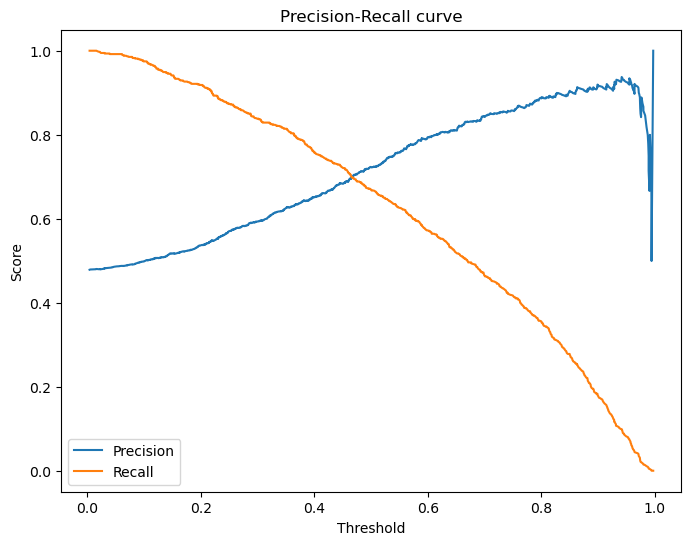

In [32]:
from sklearn.metrics import precision_recall_curve

# Menghitung precision, recall, dan thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Menampilkan Precision-Recall curve
plt.figure(figsize = (8, 6))
plt.plot(thresholds, precision[:-1], label = 'Precision')
plt.plot(thresholds, recall[:-1], label = 'Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision-Recall curve')
plt.show()


**Insight:**
1. Precision vs Recall:
    - Recall meningkat secara signifikan saat threshold diturunkan, yang sesuai dengan tujuan untuk meningkatkan recall dan memastikan sebanyak mungkin nasabah berpotensi berdeposito terdeteksi.
    - Precision cenderung menurun ketika threshold diturunkan karena model mulai memprediksi lebih banyak nasabah sebagai positif (nasabah yang berpotensi berdeposito), yang berisiko meningkatkan false positives.
2. Threshold dan Trade-off:
    - Grafik ini menunjukkan bahwa pada threshold yang lebih rendah, recall meningkat, namun precision menurun. Dengan menurunkan threshold menjadi 0.2, recall mencapai 0.9079, yang menunjukkan bahwa model dapat mendeteksi sebagian besar nasabah berpotensi berdeposito dengan trade-off yang wajar dalam hal precision.

#### ROC Curve
Pada grafik ROC Curve memvisualisasikan hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR) untuk berbagai threshold.

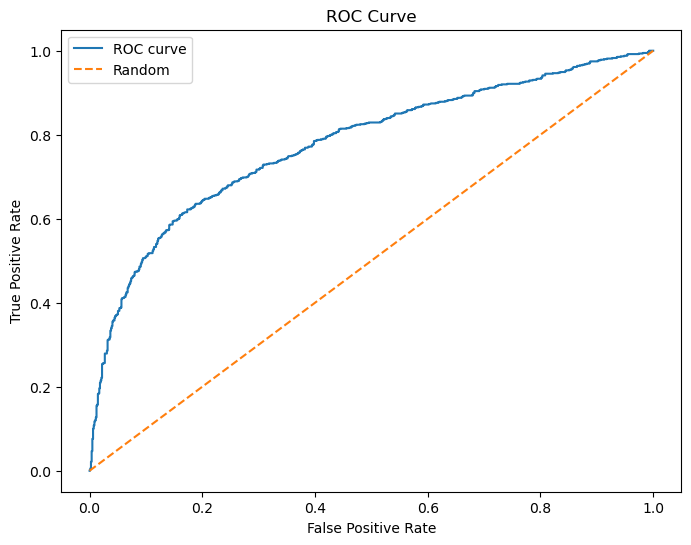

In [33]:
from sklearn.metrics import roc_curve

# Menghitung false positive rate, true positive rate dan threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Menampilkan ROC curve
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, label = 'ROC curve')
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()


**Insight:**
1. True Positive Rate (TPR) vs False Positive Rate (FPR):
    - Grafik menunjukkan bahwa ROC curve terus meningkat seiring dengan penurunan threshold, menunjukkan peningkatan kemampuan model dalam mendeteksi nasabah yang berpotensi berdeposito dengan mengorbankan beberapa false positives.
    - Garis diagonal (Random) menunjukkan performa model yang sebanding dengan prediksi acak. Model yang lebih baik akan lebih jauh berada di atas garis ini, yang berarti model ini memiliki True Positive Rate yang lebih tinggi dibandingkan False Positive Rate.
2. Evaluasi Model:
    - Dengan melihat perbedaan antara ROC curve dan Random line, dapat dikatakan bahwa model memiliki performansi yang jauh lebih baik daripada acak, meskipun ada peningkatan threshold yang dilakukan untuk memaksimalkan recall.
    - ROC-AUC pada model yang di-tune adalah 0.7703, yang menunjukkan bahwa model ini cukup baik dalam membedakan antara kelas positif dan negatif meskipun false positives mungkin meningkat karena perubahan threshold.

### 8. Feature Importance Analysis
Setelah melatih model dengan XGBoost dan melakukan preprocessing pada fitur, langkah selanjutnya adalah mengevaluasi pentingnya fitur (feature importance). Analisis ini bertujuan untuk memahami seberapa besar kontribusi setiap fitur terhadap keputusan model. Dengan mengetahui fitur mana yang paling berpengaruh, kita dapat lebih memahami faktor-faktor yang mendorong nasabah untuk berdeposito, serta memfokuskan kampanye marketing pada faktor-faktor yang paling relevan.

In [34]:
# Mendapatkan nama fitur setelah preprocessing
feature_names = random_search.best_estimator_.named_steps['Preprocessing'].get_feature_names_out()

# Mendapatkan feature importance dari model XGBoost yang telah di-tuning
importances = random_search.best_estimator_.named_steps['model'].feature_importances_

# Membuat DataFrame untuk melihat fitur dan importance-nya
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Menampilkan DataFrame menggunakan pandas
import pandas as pd
print(feat_imp)

                   Feature  Importance
30          scale__balance    0.217255
29              scale__age    0.185351
31         scale__campaign    0.084670
32            scale__pdays    0.069333
14    cat__contact_unknown    0.055198
27   cat__poutcome_success    0.055158
11        cat__housing_yes    0.034181
28   cat__poutcome_unknown    0.022385
12           cat__loan_yes    0.020853
22          cat__month_may    0.016639
20          cat__month_jun    0.016491
0     cat__job_blue-collar    0.015785
3      cat__job_management    0.015780
15          cat__month_aug    0.015022
8      cat__job_technician    0.014438
23          cat__month_nov    0.014412
13  cat__contact_telephone    0.014319
19          cat__month_jul    0.014023
24          cat__month_oct    0.013228
21          cat__month_mar    0.013150
6        cat__job_services    0.010906
17          cat__month_feb    0.009670
18          cat__month_jan    0.008773
1    cat__job_entrepreneur    0.008497
5   cat__job_self-employe

**Insight:**

1. **Fitur Paling Penting:**  
   - `scale__balance` memiliki importance tertinggi (0.2173), menunjukkan bahwa saldo nasabah adalah faktor yang paling berpengaruh dalam keputusan untuk berdeposito. Nasabah dengan saldo lebih tinggi cenderung memiliki kecenderungan lebih besar untuk berinvestasi pada produk deposito.  
   - `scale__age` memiliki importance signifikan (0.1854), mengindikasikan bahwa usia nasabah memengaruhi keputusan untuk berdeposito. Nasabah yang lebih tua kemungkinan memiliki kestabilan finansial yang lebih baik dan lebih tertarik pada produk investasi jangka panjang.  
   - `scale__campaign` (0.0847) dan `scale__pdays` (0.0693) menunjukkan pentingnya kampanye sebelumnya dan waktu kontak terakhir dalam memprediksi keputusan nasabah. Nasabah yang lebih sering terlibat dalam kampanye atau baru-baru ini dihubungi lebih cenderung untuk berdeposito.  

2. **Fitur Kategorikal:**  
   - `cat__contact_unknown` (0.0552) menunjukkan bahwa meskipun saluran komunikasi yang tidak terdaftar sebelumnya memiliki pengaruh cukup besar, hal ini bisa menjadi indikator penting terkait metode komunikasi yang efektif untuk konversi.  
   - `cat__poutcome_success` (0.0552) juga sangat penting. Hasil kampanye sebelumnya yang berhasil menunjukkan bahwa nasabah yang terlibat dalam kampanye sukses lebih mungkin untuk berdeposito. Menargetkan nasabah yang sudah berinteraksi dalam kampanye sukses dapat menjadi strategi efektif.  
   - `cat__housing_yes` dan `cat__loan_yes` menunjukkan bahwa nasabah yang memiliki kewajiban pinjaman atau kepemilikan rumah lebih cenderung berpotensi untuk berdeposito, karena ini mencerminkan kestabilan finansial dan kemauan untuk berinvestasi.  

3. **Waktu Kontak:**  
   - Beberapa bulan seperti `cat__month_may`, `cat__month_jun`, dan `cat__month_oct` memiliki pengaruh lebih besar. Ini menunjukkan bahwa waktu kontak dapat berperan dalam keputusan nasabah untuk berdeposito, dengan bulan tertentu lebih cenderung menghasilkan konversi. Faktor musiman atau perencanaan finansial tahunan nasabah bisa mempengaruhi keputusan mereka.  

4. **Fitur dengan Importance Rendah:**  
   - Beberapa fitur pekerjaan seperti `cat__job_unknown`, `cat__job_technician`, dan `cat__job_services` memiliki importance rendah. Meskipun informasi pekerjaan tetap penting, pengaruhnya terhadap keputusan nasabah untuk berdeposito relatif kecil. Tim marketing dapat lebih fokus pada fitur-fitur lain yang lebih signifikan dalam meningkatkan konversi.  

5. **Kesimpulan Strategi Marketing:**  
   - Berdasarkan pentingnya fitur seperti saldo (`balance`) dan usia (`age`), serta hasil kampanye sebelumnya (`poutcome_success`), strategi marketing dapat difokuskan pada nasabah dengan saldo lebih tinggi dan yang lebih tua, serta mereka yang sudah berpartisipasi dalam kampanye sukses.  
   - Waktu yang tepat untuk menghubungi nasabah juga menjadi faktor penting, dengan bulan-bulan tertentu menunjukkan potensi konversi yang lebih tinggi.  

## Save Model
Pada bagian ini, model hasil tuning yang telah dilatih menggunakan RandomizedSearchCV disimpan ke dalam file menggunakan Pickle. Proses ini penting untuk memastikan bahwa model yang telah dilatih dan dioptimalkan dapat digunakan kembali di lain waktu tanpa perlu melatih ulang, yang dapat menghemat waktu dan sumber daya komputasi.

Langkah-langkah yang dilakukan:
- Model disimpan dalam file dengan format .pkl menggunakan pickle.dump().
- Ini memungkinkan pemuatan model kembali tanpa perlu melakukan pelatihan ulang, yang sangat efisien untuk digunakan pada sistem produksi atau dalam pengujian lebih lanjut.

In [ ]:
import pickle

# Menyimpan model ke file menggunakan pickle
with open('Model_Bank_Marketing_Campaign.pkl', 'wb') as file:
    pickle.dump(random_search, file)

print("Model telah disimpan menggunakan Pickle.")

Model telah disimpan menggunakan Pickle.


## Load Model
Setelah model disimpan, model dapat dimuat kembali kapan saja untuk digunakan dalam prediksi lebih lanjut atau evaluasi. Proses pemuatan model memungkinkan penggunaan model yang telah disimpan pada aplikasi lain, atau untuk menguji model pada data yang berbeda tanpa melakukan pelatihan ulang.

Langkah-langkah yang dilakukan:
- Model dimuat kembali dari file .pkl menggunakan pickle.load().
- Pemuatan model ini memungkinkan untuk langsung menggunakan model yang telah dioptimalkan tanpa memerlukan data pelatihan atau konfigurasi ulang.

In [ ]:
# Memuat model dari file
with open('Model_Bank_Marketing_Campaign.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model berhasil dimuat.")

Model berhasil dimuat.


## Testing
Setelah model dimuat, kita dapat mengujinya dengan test data yang telah disiapkan sebelumnya. Tujuan pengujian ini adalah untuk evaluasi performa model pada data yang tidak digunakan selama pelatihan, guna memastikan bahwa model dapat menghasilkan prediksi yang akurat dan dapat digeneralisasi dengan baik.

Langkah-langkah yang dilakukan:
- Menggunakan data uji (test data) yang telah disiapkan untuk mengevaluasi kinerja model yang dimuat.
- Melakukan prediksi menggunakan model yang telah dimuat dan membandingkan hasil prediksi dengan label yang sebenarnya untuk menghitung metrik kinerja seperti accuracy, precision, recall, dan lain-lain.

In [ ]:
# Test data
test_data = pd.DataFrame([
    {
        'job': 'admin.', 
        'housing': 'yes', 
        'loan': 'no', 
        'contact': 'cellular', 
        'month': 'jan', 
        'poutcome': 'success', 
        'age': 28, 
        'balance': 1200, 
        'campaign': 3, 
        'pdays': 10
    },
    {
        'job': 'self-employed', 
        'housing': 'no', 
        'loan': 'yes', 
        'contact': 'telephone', 
        'month': 'feb', 
        'poutcome': 'failure', 
        'age': 34, 
        'balance': 800, 
        'campaign': 2, 
        'pdays': 50
    },
    {
        'job': 'blue-collar', 
        'housing': 'yes', 
        'loan': 'no', 
        'contact': 'cellular', 
        'month': 'mar', 
        'poutcome': 'other', 
        'age': 45, 
        'balance': 1500, 
        'campaign': 4, 
        'pdays': 20
    }
])

# Menampilkan contoh test data
print(test_data)

             job housing loan    contact month poutcome  age  balance  \
0         admin.     yes   no   cellular   jan  success   28     1200   
1  self-employed      no  yes  telephone   feb  failure   34      800   
2    blue-collar     yes   no   cellular   mar    other   45     1500   

   campaign  pdays  
0         3     10  
1         2     50  
2         4     20  


**Insight:**
1. Nasabah pertama (job: admin., housing: yes, loan: no, contact: cellular, month: jan, poutcome: success, age: 28, balance: 1200, campaign: 3, pdays: 10)  
2. Nasabah kedua (job: self-employed, housing: no, loan: yes, contact: telephone, month: feb, poutcome: failure, age: 34, balance: 800, campaign: 2, pdays: 50)  
3. Nasabah ketiga (job: blue-collar, housing: yes, loan: no, contact: cellular, month: mar, poutcome: other, age: 45, balance: 1500, campaign: 4, pdays: 20)

In [ ]:
# Menggunakan pipeline yang sudah dilatih (termasuk preprocessing)
y_pred = loaded_model.predict(test_data)
y_pred_proba = loaded_model.predict_proba(test_data)[:, 1]

# Menampilkan hasil prediksi
print("Predictions:", y_pred)
print("Predicted Probabilities:", y_pred_proba)

Predictions: [1 0 1]
Predicted Probabilities: [0.8669129  0.15844016 0.88979214]


**Prediksi dan Probabilitas:**

Predictions: \[1 0 1]  
- Nasabah pertama dan ketiga diprediksi akan berdeposito (kelas 1), sementara nasabah kedua diprediksi tidak akan berdeposito (kelas 0).

Predicted Probabilities: \[0.8669129  0.15844016 0.88979214]  
- Nasabah pertama: Probabilitas 0.8669 untuk berdeposito, menunjukkan bahwa model cukup yakin bahwa nasabah ini akan berdeposito.  
- Nasabah kedua: Probabilitas 0.1584 untuk berdeposito, yang menunjukkan bahwa model sangat yakin bahwa nasabah ini tidak berdeposito (dengan probabilitas tinggi untuk kelas 0).  
- Nasabah ketiga: Probabilitas 0.8898 untuk berdeposito, menunjukkan keyakinan yang tinggi bahwa nasabah ini akan berdeposito.

## Kesimpulan & Rekomendasi

### Kesimpulan

Berdasarkan analisis yang dilakukan, berikut adalah temuan utama terkait model dan aplikasinya dalam konteks kampanye telemarketing deposito berjangka:

1. Pentingnya Fitur Utama:  
   Fitur seperti `scale__balance` (saldo nasabah) dan `scale__age` (usia nasabah) memiliki pengaruh signifikan dalam memprediksi nasabah yang berpotensi berdeposito. Nasabah dengan saldo lebih tinggi dan usia yang lebih tua cenderung lebih tertarik pada produk deposito. Oleh karena itu, tim marketing sebaiknya memprioritaskan nasabah dengan saldo tinggi dan usia yang lebih tua dalam kampanye telemarketing.

2. Performa Model:  
   Threshold 0.2 memberikan recall tinggi (0.9186), yang menunjukkan model sudah sangat efektif dalam mendeteksi nasabah yang berpotensi berdeposito. Dengan precision yang seimbang, model ini mampu menjaga false positives terkendali sehingga biaya telemarketing tidak meningkat signifikan. Hasil ini menunjukkan bahwa model telah mencapai performa optimal untuk kampanye telemarketing tanpa penyesuaian lebih lanjut pada recall.

3. Threshold Tuning:  
   Dengan threshold 0.2, model mencapai recall yang sangat tinggi tanpa mengorbankan precision, memberikan pendekatan yang lebih ekonomis untuk kampanye telemarketing. False negatives berhasil diminimalkan, yang sangat penting dalam konteks biaya peluang yang tinggi. Ini membuat threshold 0.2 menjadi pilihan yang baik untuk menyeimbangkan performa model dan biaya operasional.

4. Pengujian pada Data Uji:  
   Pengujian menunjukkan bahwa meskipun beberapa false negatives masih terjadi, hasil recall yang sangat tinggi menandakan bahwa model cukup efektif dalam memprediksi nasabah yang berpotensi berdeposito. Hal ini menunjukkan bahwa model dapat diterapkan secara efektif dalam kampanye telemarketing.

---

### Rekomendasi

1. Fokus pada Nasabah dengan Saldo Lebih Tinggi dan Usia Lebih Tua:  
   Mengingat pengaruh besar `scale__balance` dan `scale__age`, tim marketing sebaiknya memprioritaskan nasabah dengan saldo lebih tinggi dan usia yang lebih tua, karena mereka lebih cenderung berinvestasi dalam produk deposito.

2. Optimalisasi Waktu Kampanye:  
   Beberapa bulan seperti `mar`, `oct`, dan `sep` menunjukkan pengaruh signifikan dalam meningkatkan konversi. Oleh karena itu, tim marketing sebaiknya mengoptimalkan penjadwalan kampanye telemarketing pada bulan-bulan tersebut untuk meningkatkan peluang konversi.

3. Threshold 0.2 sebagai Pendekatan Optimal:  
   Berdasarkan hasil threshold tuning, threshold 0.2 memberikan trade-off terbaik antara recall dan precision. Dengan recall 0.9186 dan false positives yang terkendali, pendekatan ini sudah optimal dan tidak perlu dilakukan penyesuaian lebih lanjut. Tim marketing dapat melanjutkan dengan threshold ini untuk mendapatkan hasil maksimal tanpa meningkatkan biaya secara signifikan.

4. Penggunaan Fitur Keuangan untuk Penargetan:  
   Status pinjaman dan kepemilikan rumah merupakan indikator penting dalam memprediksi nasabah yang lebih cenderung berdeposito. Tim marketing harus lebih memfokuskan usaha pada nasabah dengan status keuangan yang stabil, seperti memiliki rumah atau pinjaman yang terkendali, karena mereka lebih cenderung tertarik pada produk investasi seperti deposito.